In [92]:
from sklearn.mixture import GaussianMixture 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
import random
import tabulate

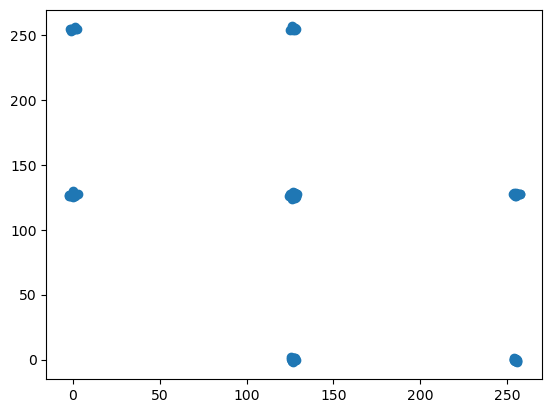

In [93]:
# read a pickle file
df = pd.read_pickle("./SMAI-Dataset-problem-4.3/colors.pkl")
# df
plt.scatter(df[:,0], df[:,1])

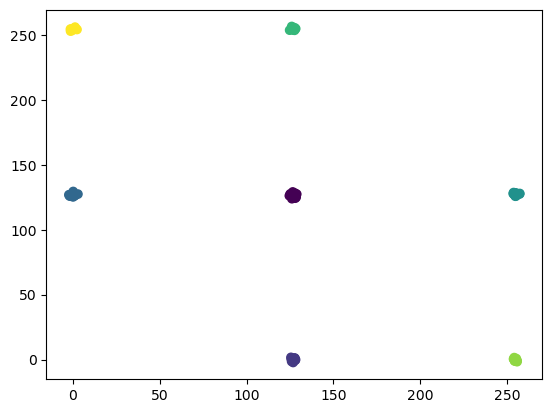

In [97]:

gmm = GaussianMixture(n_components=7)
gmm.fit(df)

labels = gmm.predict(df)

means = gmm.means_
covariances = gmm.covariances_

plt.scatter(df[:, 0], df[:, 1], c=labels, cmap="viridis")
plt.show()

In [76]:
def generateSample(n, means, covariances):
    samples = []

    for i in range(n):
        for j in range(100):
            samples.append([np.random.multivariate_normal(means[i], covariances[i]), i+1])
    for i in range(len(samples)):
        samples[i] = [samples[i][0][0], samples[i][0][1], samples[i][1]]
    
    
    random.shuffle(samples)
    return np.array(samples)

In [77]:
samples = generateSample(n, means, covariances)

In [85]:
samples[:5, :]

array([[125.22790325, 255.03771617,   7.        ],
       [ -2.33771532, 253.15105187,   2.        ],
       [128.31673047, 126.6667157 ,   5.        ],
       [ -1.47699694, 254.69735054,   2.        ],
       [254.41939498,  -0.83072234,   6.        ]])

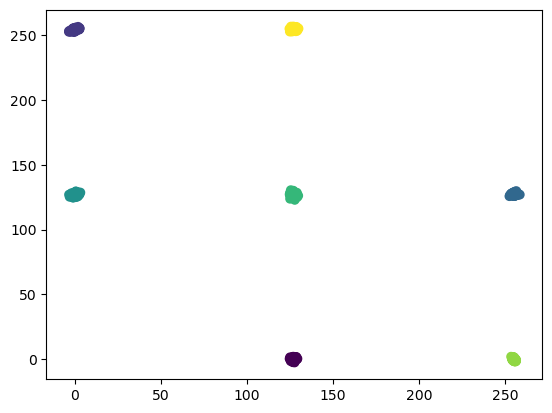

In [83]:
plt.scatter(samples[:, 0], samples[:,1], c= samples[:, 2], cmap="viridis")
classes = set(samples[:, 2])